<ipython-input-1-10e4d0489269>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Len'] = [len(s) for s in dfp['Seq'].to_list()]
<ipython-input-1-10e4d0489269>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Len'] = [len(s) for s in dfn['Seq'].to_list()]


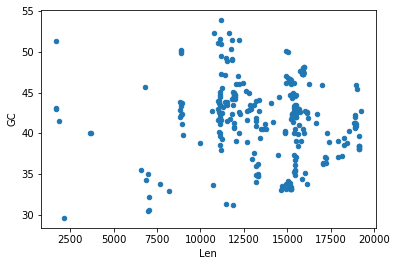

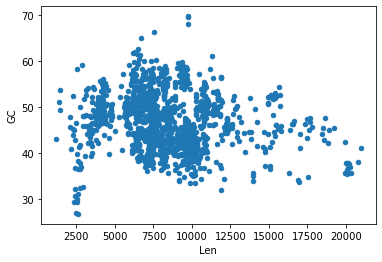

In [1]:
import numpy as np
import pandas as pd
from Bio import SeqUtils
from Bio import SeqIO

#load data

df = pd.read_csv('final file hopefully no errors.csv')
dfp = df.loc[df['Gen'] == 'ssRNA(+)']
dfn = df.loc[df['Gen'] == 'ssRNA(-)']


#Looking at stats

dfp['Len'] = [len(s) for s in dfp['Seq'].to_list()]
dfn['Len'] = [len(s) for s in dfn['Seq'].to_list()]

dfp = dfp.sort_values('Len').reset_index(drop = True)
dfn = dfn.sort_values('Len').reset_index(drop = True)

dfp['GC'] = [SeqUtils.GC(dfp.loc[i,'Seq']) for i in range(len(dfp))]
dfn['GC'] = [SeqUtils.GC(dfn.loc[i,'Seq']) for i in range(len(dfn))]

dfn.plot(x = 'Len', y = 'GC', kind='scatter')

dfp.loc[dfp['GC'] > 65 ] 

dfp.loc[dfp['Len'] < 25000].plot(x = 'Len', y = 'GC', kind='scatter')

#looking at distribution of gc contenct in a genome

def gc_plotter(seq, winsize):
    qgc = []
    for i in range(0, len(seq) - winsize + 1, winsize):
        query = seq[i: i + winsize]
        gc = SeqUtils.GC(query)
        qgc.append([i, gc])
        
    return qgc

import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output



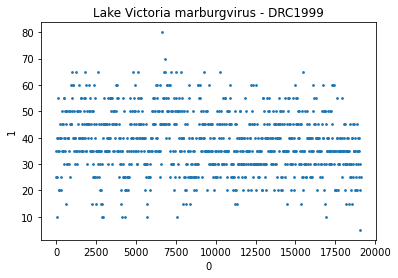

KeyboardInterrupt: 

In [4]:
for i,r in dfn.iterrows():
    pd.DataFrame(gc_plotter(r['Seq'],20)).plot(x = 0, y = 1, kind='scatter', s = 3)
    plt.title(r['Org'])
    plt.show()
    time.sleep(6)
    clear_output(wait=True)

In [11]:
dfp.cov()

,Len,GC
Len,5.475094e+07,-19062.170412
GC,-1.906217e+04,30.526314


In [9]:
dfn.to_csv('dfn', index = False)

In [1]:
df = pd.read_csv('final file hopefully no errors.csv')
df['Len'] = [len(s) for s in df['Seq'].to_list()]

dfp = df.loc[df['Gen'] == 'ssRNA(+)']
dfn = df.loc[df['Gen'] == 'ssRNA(-)']

dfp = dfp.reset_index(drop = True)
dfn = dfn.reset_index(drop = True)

In [7]:
resp1 = pd.read_csv('resultp window 1.csv')
resp2 = pd.read_csv('resultp window 2.csv')
resp3 = pd.read_csv('resultp window 3.csv')
resp4 = pd.read_csv('resultp window 4.csv')
resn1 = pd.read_csv('resultn window 1.csv')
resn2 = pd.read_csv('resultn window 2.csv')
resn3 = pd.read_csv('resultn window 3.csv')
resn4 = pd.read_csv('resultn window 4.csv')

In [14]:
resp1 = resp1.iloc[:].div(dfp['Len'], axis = 0)
resp2 = resp2.iloc[:].div(dfp['Len'], axis = 0)
resp3 = resp3.iloc[:].div(dfp['Len'], axis = 0)
resp4 = resp4.iloc[:].div(dfp['Len'], axis = 0)
resn1 = resn1.iloc[:].div(dfn['Len'], axis = 0)
resn2 = resn2.iloc[:].div(dfn['Len'], axis = 0)
resn3 = resn3.iloc[:].div(dfn['Len'], axis = 0)
resn4 = resn4.iloc[:].div(dfn['Len'], axis = 0)

In [28]:
resp = pd.concat([resp1,resp2,resp3,resp4], axis = 1)
resn = pd.concat([resn1,resn2,resn3,resn4], axis = 1)

In [325]:
res = pd.concat([resp, resn])

In [326]:
res.to_csv('res 340.csv', index = False)

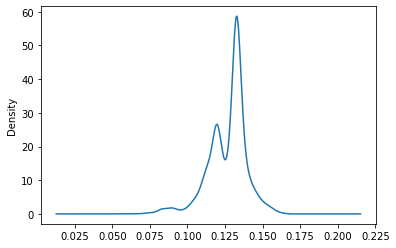

In [69]:
resp.iloc[:, 6].plot(kind='kde')

In [179]:
#normalizing

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

x = resp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [92]:
df = pd.DataFrame(StandardScaler().fit_transform(resp))

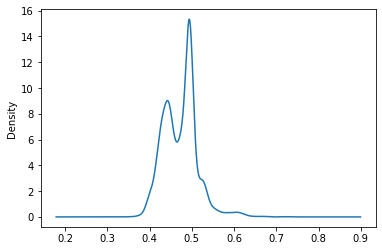

In [97]:
resp.iloc[:,3].plot(kind='kde')

In [113]:
x = np.log2(resp)

In [114]:
df = pd.DataFrame(StandardScaler().fit_transform(x))

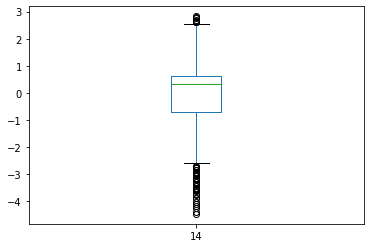

In [132]:
#boxplots
df.iloc[:,14].plot(kind='box')

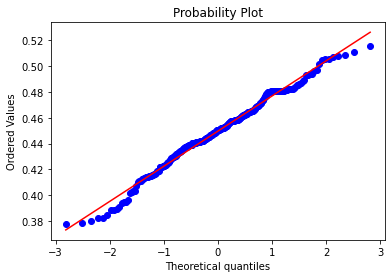

In [149]:
#qq plots

import pylab 
import scipy.stats as stats

x = resn.iloc[:,3].values
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

#they look pretty normal here

In [163]:
#Kolmogorov Smirnov test

from scipy.stats import kstest, norm
#my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(resp.iloc[:,18], 'norm')
print(ks_statistic, p_value)

#concludes data is not normally distributed

0.5176984592018089 0.0


In [180]:
#Shapiro Wilk test
#Said to be the most powerful test

from scipy.stats import shapiro

for i in range(len(df.columns)):
    print(shapiro(df.iloc[:,i]))
    
#data is not normally distributed

(0.9462783932685852, 4.105290358241133e-31)
(0.920068085193634, 1.652776338722015e-36)
(0.9659501314163208, 1.7690442457852756e-25)
(0.9512980580329895, 7.510385751471461e-30)
(0.9536484479904175, 3.1749352356274613e-29)
(0.9747068881988525, 3.9923977782906563e-22)
(0.9325628876686096, 3.814500060993699e-34)
(0.9565375447273254, 2.0222459416472846e-28)
(0.9427706003189087, 6.092370929351365e-32)
(0.9185205698013306, 8.839298339366178e-37)
(0.9574241638183594, 3.6379767017655194e-28)
(0.8200321793556213, 0.0)
(0.9758757948875427, 1.293234586647808e-21)
(0.9581089019775391, 5.7625157642552585e-28)
(0.9718424677848816, 2.6313301152537246e-23)
(0.9663345217704773, 2.401217160668698e-25)
(0.946264922618866, 4.074562465712898e-31)
(0.9342604279518127, 8.486892888784292e-34)
(0.9461126327514648, 3.743204008851694e-31)
(0.9293439984321594, 8.738138275883248e-35)
(0.9637339115142822, 3.191426155221023e-26)
(0.9713624119758606, 1.7024400884687414e-23)
(0.9590638875961304, 1.1051584022141692e-27)

(0.9837092757225037, 1.2623401496102292e-17)
(0.9382749199867249, 6.013948852293813e-33)
(0.8478647470474243, 0.0)
(0.9231754541397095, 5.98254411735042e-36)
(0.9790276885032654, 3.8439987794134176e-20)
(0.9807745218276978, 2.9621950366165093e-19)
(0.9656085968017578, 1.3513685274882353e-25)
(0.9751482605934143, 6.192978663510734e-22)
(0.9719263911247253, 2.8409765272478123e-23)
(0.9484947919845581, 1.4417196531196827e-30)
(0.9892027974128723, 6.458628933319471e-14)
(0.9328737854957581, 4.410878165922511e-34)
(0.9785894155502319, 2.3478825369262983e-20)
(0.9528387784957886, 1.9202278375823575e-29)
(0.9459072947502136, 3.3397762284404465e-31)
(0.9713292717933655, 1.6523089245750324e-23)
(0.9703921675682068, 7.177622917830714e-24)
(0.9812911152839661, 5.55821841255899e-19)
(0.9639027714729309, 3.6259865167479456e-26)
(0.9463261961936951, 4.216163925806171e-31)
(0.9734347462654114, 1.1616715203186686e-22)
(0.9353256225585938, 1.41356639517486e-33)
(0.9803121089935303, 1.7036985419887514e-

In [202]:
#But I guess data does not have to be normally distributed to be used as a feature

#Lets calculate datapoints between overlapping range for every feature

rpd = resp.describe()
rnd = resn.describe()

In [218]:
odf = pd.DataFrame(columns = rpd.columns)

for c in rpd.columns:
    odf.loc[0, c] = max(rpd.loc['min', c], rnd.loc['min', c])
    odf.loc[1, c] = max(rpd.loc['25%', c], rnd.loc['25%', c])
    #odf.loc[2, c] = min(rpd.loc['50%', c], rnd.loc['50%', c])
    odf.loc[3, c] = min(rpd.loc['75%', c], rnd.loc['75%', c])
    odf.loc[4, c] = min(rpd.loc['max', c], rnd.loc['max', c])

In [229]:
odf.loc['in range', :] = 0
odf.loc['in 50% range', :] = 0

for i,r in resp.iterrows():
    for c in resp.columns:
        if odf.loc[0,c] <= r[c] <= odf.loc[4,c]:
            odf.loc['in range',c] = odf.loc['in range',c] + 1
            
        if odf.loc[1,c] <= r[c] <= odf.loc[3,c]:
            odf.loc['in 50% range',c] = odf.loc['in 50% range',c] + 1

for i,r in resn.iterrows():
    for c in resn.columns:
        if odf.loc[0,c] <= r[c] <= odf.loc[4,c]:
            odf.loc['in range',c] = odf.loc['in range',c] + 1
            
        if odf.loc[1,c] <= r[c] <= odf.loc[3,c]:
            odf.loc['in 50% range',c] = odf.loc['in 50% range',c] + 1

0 iterations done
1 iterations done
2 iterations done
3 iterations done
4 iterations done
5 iterations done
6 iterations done
7 iterations done
8 iterations done
9 iterations done
10 iterations done
11 iterations done
12 iterations done
13 iterations done
14 iterations done
15 iterations done
16 iterations done
17 iterations done
18 iterations done
19 iterations done
20 iterations done
21 iterations done
22 iterations done
23 iterations done
24 iterations done
25 iterations done
26 iterations done
27 iterations done
28 iterations done
29 iterations done
30 iterations done
31 iterations done
32 iterations done
33 iterations done
34 iterations done
35 iterations done
36 iterations done
37 iterations done
38 iterations done
39 iterations done
40 iterations done
41 iterations done
42 iterations done
43 iterations done
44 iterations done
45 iterations done
46 iterations done
47 iterations done
48 iterations done
49 iterations done
50 iterations done
51 iterations done
52 iterations done
53 

416 iterations done
417 iterations done
418 iterations done
419 iterations done
420 iterations done
421 iterations done
422 iterations done
423 iterations done
424 iterations done
425 iterations done
426 iterations done
427 iterations done
428 iterations done
429 iterations done
430 iterations done
431 iterations done
432 iterations done
433 iterations done
434 iterations done
435 iterations done
436 iterations done
437 iterations done
438 iterations done
439 iterations done
440 iterations done
441 iterations done
442 iterations done
443 iterations done
444 iterations done
445 iterations done
446 iterations done
447 iterations done
448 iterations done
449 iterations done
450 iterations done
451 iterations done
452 iterations done
453 iterations done
454 iterations done
455 iterations done
456 iterations done
457 iterations done
458 iterations done
459 iterations done
460 iterations done
461 iterations done
462 iterations done
463 iterations done
464 iterations done
465 iterations done


827 iterations done
828 iterations done
829 iterations done
830 iterations done
831 iterations done
832 iterations done
833 iterations done
834 iterations done
835 iterations done
836 iterations done
837 iterations done
838 iterations done
839 iterations done
840 iterations done
841 iterations done
842 iterations done
843 iterations done
844 iterations done
845 iterations done
846 iterations done
847 iterations done
848 iterations done
849 iterations done
850 iterations done
851 iterations done
852 iterations done
853 iterations done
854 iterations done
855 iterations done
856 iterations done
857 iterations done
858 iterations done
859 iterations done
860 iterations done
861 iterations done
862 iterations done
863 iterations done
864 iterations done
865 iterations done
866 iterations done
867 iterations done
868 iterations done
869 iterations done
870 iterations done
871 iterations done
872 iterations done
873 iterations done
874 iterations done
875 iterations done
876 iterations done


1226 iterations done
1227 iterations done
1228 iterations done
1229 iterations done
1230 iterations done
1231 iterations done
1232 iterations done
1233 iterations done
1234 iterations done
1235 iterations done
1236 iterations done
1237 iterations done
1238 iterations done
1239 iterations done
1240 iterations done
1241 iterations done
1242 iterations done
1243 iterations done
1244 iterations done
1245 iterations done
1246 iterations done
1247 iterations done
1248 iterations done
1249 iterations done
1250 iterations done
1251 iterations done
1252 iterations done
1253 iterations done
1254 iterations done
1255 iterations done
1256 iterations done
1257 iterations done
1258 iterations done
1259 iterations done
1260 iterations done
1261 iterations done
1262 iterations done
1263 iterations done
1264 iterations done
1265 iterations done
1266 iterations done
1267 iterations done
1268 iterations done
1269 iterations done
1270 iterations done
1271 iterations done
1272 iterations done
1273 iteratio

1618 iterations done
1619 iterations done
1620 iterations done
1621 iterations done
1622 iterations done
1623 iterations done
1624 iterations done
1625 iterations done
1626 iterations done
1627 iterations done
1628 iterations done
1629 iterations done
1630 iterations done
1631 iterations done
1632 iterations done
1633 iterations done
1634 iterations done
1635 iterations done
1636 iterations done
1637 iterations done
1638 iterations done
1639 iterations done
1640 iterations done
1641 iterations done
1642 iterations done
1643 iterations done
1644 iterations done
1645 iterations done
1646 iterations done
1647 iterations done
1648 iterations done
1649 iterations done
1650 iterations done
1651 iterations done
1652 iterations done
1653 iterations done
1654 iterations done
1655 iterations done
1656 iterations done
1657 iterations done
1658 iterations done
1659 iterations done
1660 iterations done
1661 iterations done
1662 iterations done
1663 iterations done
1664 iterations done
1665 iteratio

2010 iterations done
2011 iterations done
2012 iterations done
2013 iterations done
2014 iterations done
2015 iterations done
2016 iterations done
2017 iterations done
2018 iterations done
2019 iterations done
2020 iterations done
2021 iterations done
2022 iterations done
2023 iterations done
2024 iterations done
2025 iterations done
2026 iterations done
2027 iterations done
2028 iterations done
2029 iterations done
2030 iterations done
2031 iterations done
2032 iterations done
2033 iterations done
2034 iterations done
2035 iterations done
2036 iterations done
2037 iterations done
2038 iterations done
2039 iterations done
2040 iterations done
2041 iterations done
2042 iterations done
2043 iterations done
2044 iterations done
2045 iterations done
2046 iterations done
2047 iterations done
2048 iterations done
2049 iterations done
2050 iterations done
2051 iterations done
2052 iterations done
2053 iterations done
2054 iterations done
2055 iterations done
2056 iterations done
2057 iteratio

2401 iterations done
2402 iterations done
2403 iterations done
2404 iterations done
2405 iterations done
2406 iterations done
2407 iterations done
2408 iterations done
2409 iterations done
2410 iterations done
2411 iterations done
2412 iterations done
2413 iterations done
2414 iterations done
2415 iterations done
2416 iterations done
2417 iterations done
2418 iterations done
2419 iterations done
2420 iterations done
2421 iterations done
2422 iterations done
2423 iterations done
2424 iterations done
2425 iterations done
2426 iterations done
2427 iterations done
2428 iterations done
2429 iterations done
2430 iterations done
2431 iterations done
2432 iterations done
2433 iterations done
2434 iterations done
2435 iterations done
2436 iterations done
2437 iterations done
2438 iterations done
2439 iterations done
2440 iterations done
2441 iterations done
2442 iterations done
2443 iterations done
2444 iterations done
2445 iterations done
2446 iterations done
2447 iterations done
2448 iteratio

2793 iterations done
2794 iterations done
2795 iterations done
2796 iterations done
2797 iterations done
2798 iterations done
2799 iterations done
2800 iterations done
2801 iterations done
2802 iterations done
2803 iterations done
2804 iterations done
2805 iterations done
2806 iterations done
2807 iterations done
2808 iterations done
2809 iterations done
2810 iterations done
2811 iterations done
2812 iterations done
2813 iterations done
2814 iterations done
2815 iterations done
2816 iterations done
2817 iterations done
2818 iterations done
2819 iterations done
2820 iterations done
2821 iterations done
2822 iterations done
2823 iterations done
2824 iterations done
2825 iterations done
2826 iterations done
2827 iterations done
2828 iterations done
2829 iterations done
2830 iterations done
2831 iterations done
2832 iterations done
2833 iterations done
2834 iterations done
2835 iterations done
2836 iterations done
2837 iterations done
2838 iterations done
2839 iterations done
2840 iteratio

In [246]:
for c in odf.columns:
    if odf.loc['in range', c] < 2000:
        print(odf[c])

0               0.00496307
1               0.00958225
3               0.00817776
4                0.0111183
in range              1983
in 50% range             0
Name: TGGT, dtype: object


In [261]:
odf.transpose().loc[odf.transpose()['in 50% range'] == 0]

,0,1,3,4,in range,in 50% range
A,0.437363,0.532214,0.529152,0.620755,3090,0
AT,0.0937903,0.143722,0.143139,0.211612,3057,0
GC,0.0576827,0.0996506,0.0987737,0.136459,2979,0
ATA,0.0161335,0.0346836,0.0339507,0.080138,2994,0
ATC,0.0230486,0.0392653,0.031481,0.052781,3105,0
AGA,0.020304,0.0424569,0.0412186,0.0578568,3080,0
TGG,0.0169887,0.0351958,0.0333795,0.0414585,2596,0
TCA,0.0328797,0.0401189,0.0377007,0.0550449,2390,0
GAT,0.0263735,0.0381203,0.0370642,0.0514842,2921,0
GTG,0.0181693,0.0293052,0.0265517,0.0361451,2416,0


In [271]:
rpd = rpd.append([resp.quantile(q=0.05), resp.quantile(q=0.10), resp.quantile(q=0.90), resp.quantile(q=0.95)])

In [282]:
rpd.index = rpd.index.astype(str)
rpd = rpd.reindex(['count', 'mean', 'std', 'min', '0.05', '0.1','25%', '50%', '75%', '0.9', '0.95', 'max'])

In [294]:
rnd = rnd.append([resn.quantile(q=0.05), resn.quantile(q=0.10), resn.quantile(q=0.90), resn.quantile(q=0.95)])

In [295]:
rnd.index = rnd.index.astype(str)
rnd = rnd.reindex(['count', 'mean', 'std', 'min', '0.05', '0.1','25%', '50%', '75%', '0.9', '0.95', 'max'])

In [300]:
odf.index = ['greater min', 'greater 25%', 'lower 75%', 'lower max', 'in 100% range', 'in mid 50% range']

In [303]:
for c in rpd.columns:
    odf.loc['greater 5%', c] = max(rpd.loc['0.05', c], rnd.loc['0.05', c])
    odf.loc['greater 10%', c] = max(rpd.loc['0.1', c], rnd.loc['0.1', c])
    #odf.loc[2, c] = min(rpd.loc['50%', c], rnd.loc['50%', c])
    odf.loc['lower 90%', c] = min(rpd.loc['0.9', c], rnd.loc['0.9', c])
    odf.loc['lower 95%', c] = min(rpd.loc['0.95', c], rnd.loc['0.95', c])

In [309]:
odf = odf.reindex(['greater min', 'greater 5%', 'greater 10%', 'greater 25%', 'lower 75%', 'lower 90%', 'lower 95%',
                   'lower max', 'in 100% range', 'in mid 50% range'])

,A,T,G,C,AA,AT,AG,AC,TA,TT,...,CCTG,CCTC,CCGA,CCGT,CCGG,CCGC,CCCA,CCCT,CCCG,CCCC
greater min,0.437363,0.440509,0.378016,0.377757,0.0856393,0.0937903,0.0860272,0.0797561,0.08383,0.0793096,...,0.00214162,0.00212624,0.00130269,0.000687939,0.000306608,0.000309869,0.00264057,0.00170898,0.000453747,0.000592799
greater 5%,0.508537,0.47407,0.441693,0.414933,0.12415,0.123998,0.124795,0.109415,0.103926,0.0997122,...,0.00408874,0.00320626,0.00210494,0.00217986,0.00152685,0.00165425,0.00346962,0.00279042,0.00148196,0.00149823
greater 10%,0.524875,0.476998,0.450217,0.424325,0.135462,0.137073,0.127276,0.112715,0.110612,0.103878,...,0.00480165,0.00393691,0.00249307,0.00250781,0.00166911,0.00190144,0.00423538,0.003322,0.00177834,0.00185482
greater 25%,0.532214,0.492795,0.462793,0.442742,0.139773,0.143722,0.130665,0.116767,0.114902,0.112953,...,0.00579441,0.00537411,0.00353463,0.00312015,0.00248582,0.00261171,0.00523529,0.00457362,0.00264054,0.00302394
lower 75%,0.529152,0.518096,0.475053,0.466254,0.14755,0.143139,0.133507,0.124593,0.127195,0.136793,...,0.00802134,0.0080139,0.00546097,0.00362632,0.00428869,0.00386274,0.00790306,0.00731925,0.00457529,0.00614593
lower 90%,0.558418,0.531333,0.483032,0.481467,0.168829,0.15714,0.13942,0.128484,0.147167,0.150198,...,0.00869413,0.00920814,0.00721636,0.00434071,0.00582653,0.00500051,0.0104046,0.00823024,0.00650784,0.0094157
lower 95%,0.568769,0.53788,0.488958,0.492959,0.176315,0.165573,0.144926,0.131601,0.153871,0.154641,...,0.00992117,0.0105564,0.00763936,0.00483318,0.00612584,0.0055942,0.011137,0.00942157,0.00673996,0.00971155
lower max,0.620755,0.638483,0.51193,0.515103,0.222802,0.211612,0.162155,0.141942,0.187866,0.245763,...,0.015097,0.0189808,0.0115323,0.00673592,0.0106876,0.00748232,0.0124332,0.0136166,0.00860505,0.011509
in 100% range,3090,3122,2907,2842,3048,3057,3106,3030,2969,3127,...,3126,3068,3107,2761,3093,2747,2255,2994,2859,2145
in mid 50% range,0,679,354,617,820,0,845,664,449,724,...,826,767,1548,365,1220,490,633,841,668,745


In [311]:
odf.loc['in 80% range', :] = 0
odf.loc['in 90% range', :] = 0

for i,r in resp.iterrows():
    for c in resp.columns:
        if odf.loc['greater 10%', c] <= r[c] <= odf.loc['lower 90%', c]:
            odf.loc['in 80% range', c] = odf.loc['in 80% range', c] + 1
            
        if odf.loc['greater 5%',c] <= r[c] <= odf.loc['lower 95%',c]:
            odf.loc['in 90% range',c] = odf.loc['in 90% range',c] + 1

for i,r in resn.iterrows():
    for c in resn.columns:
        if odf.loc['greater 10%', c] <= r[c] <= odf.loc['lower 90%', c]:
            odf.loc['in 80% range', c] = odf.loc['in 80% range', c] + 1
            
        if odf.loc['greater 5%',c] <= r[c] <= odf.loc['lower 95%',c]:
            odf.loc['in 90% range',c] = odf.loc['in 90% range',c] + 1

In [328]:
odf.transpose().loc[odf.transpose()['in 90% range'] < 600].index

Index(['ATC', 'ATCA', 'ATCT', 'TGGT'], dtype='object')